In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import pearsonr

In [2]:
import pingouin as pg

# Behav data

In [3]:
df_behav = pd.read_spss('Behav_OTPH_Responses.sav') 
df_behav = df_behav.drop([4]) # drop participant OTPH_5 because of recording problems 
df_behav.reset_index(drop=True, inplace=True)
df_behav.head(19)

,Gr1_Scale_1_0,Gr1_Scale_1_1,Gr1_Scale_1_2,Gr1_Scale_1_3,Gr1_Scale_1_4,Gr1_Scale_1_5,Gr1_Scale_1_6,Gr1_Scale_2_0,Gr1_Scale_2_1,Gr1_Scale_2_2,...,Gr1_Scale_3_early,Gr1_Scale_1_late,Gr1_Scale_2_late,Gr1_Scale_3_late,Gr2_Scale_1_early,Gr2_Scale_2_early,Gr2_Scale_3_early,Gr2_Scale_1_late,Gr2_Scale_2_late,Gr2_Scale_3_late
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,2.333333,2.666667,2.666667,2.333333,3.000000,2.666667,2.333333,2.666667,2.666667,2.333333
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.000000,2.666667,2.000000,3.000000,2.000000,2.333333,3.000000,2.666667,2.000000,3.000000
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.666667,3.666667,3.666667,3.000000,3.333333,3.666667,2.666667,3.666667,3.666667,3.000000
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,3.000000,1.000000,5.000000,3.000000,1.333333,5.000000,3.000000,1.000000,5.000000,3.000000
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.333333,4.000000,3.000000,3.000000,4.333333,3.333333,3.333333,4.000000,3.000000,3.000000
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
6,3.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,3.0,...,2.333333,1.000000,2.666667,2.000000,1.666667,3.333333,2.333333,1.000000,2.666667,2.000000
7,3.0,5.0,5.0,5.0,4.0,3.0,2.0,5.0,5.0,5.0,...,1.333333,3.000000,4.333333,1.333333,5.000000,5.000000,1.333333,3.000000,4.333333,1.333333
8,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,...,1.000000,2.666667,2.666667,1.000000,3.333333,2.333333,1.000000,2.666667,2.666667,1.000000
9,3.0,2.0,3.0,3.0,3.0,3.0,2.0,5.0,2.0,4.0,...,1.000000,2.666667,3.666667,1.000000,2.666667,3.333333,1.000000,2.666667,3.666667,1.000000


In [4]:
df_behav = df_behav.drop(['Gr1_Scale_1_early','Gr1_Scale_2_early','Gr1_Scale_3_early',
        'Gr1_Scale_1_late', 'Gr1_Scale_2_late', 'Gr1_Scale_3_late',
        'Gr2_Scale_1_early', 'Gr2_Scale_2_early', 'Gr2_Scale_3_early',
        'Gr2_Scale_1_late', 'Gr2_Scale_2_late', 'Gr2_Scale_3_late'], axis=1)
df_behav.head()

,Gr1_Scale_1_0,Gr1_Scale_1_1,Gr1_Scale_1_2,Gr1_Scale_1_3,Gr1_Scale_1_4,Gr1_Scale_1_5,Gr1_Scale_1_6,Gr1_Scale_2_0,Gr1_Scale_2_1,Gr1_Scale_2_2,...,Gr2_Scale_2_4,Gr2_Scale_2_5,Gr2_Scale_2_6,Gr2_Scale_3_0,Gr2_Scale_3_1,Gr2_Scale_3_2,Gr2_Scale_3_3,Gr2_Scale_3_4,Gr2_Scale_3_5,Gr2_Scale_3_6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [5]:
df_behav = df_behav.rename(columns={'Gr1_Scale_1_0': 'Alertness_OT_baseline',
                    'Gr1_Scale_1_1': 'Alertness_OT_TP1',
                    'Gr1_Scale_1_2': 'Alertness_OT_TP2',
                    'Gr1_Scale_1_3': 'Alertness_OT_TP3',
                    'Gr1_Scale_1_4': 'Alertness_OT_TP4',
                    'Gr1_Scale_1_5': 'Alertness_OT_TP5',
                    'Gr1_Scale_1_6': 'Alertness_OT_TP6',
                    'Gr1_Scale_2_0': 'Excitement_OT_baseline',
                    'Gr1_Scale_2_1': 'Excitement_OT_TP1',
                    'Gr1_Scale_2_2': 'Excitement_OT_TP2',
                    'Gr1_Scale_2_3': 'Excitement_OT_TP3',
                    'Gr1_Scale_2_4': 'Excitement_OT_TP4',
                    'Gr1_Scale_2_5': 'Excitement_OT_TP5',
                    'Gr1_Scale_2_6': 'Excitement_OT_TP6',
                    'Gr1_Scale_3_0': 'Sociability_OT_baseline',
                    'Gr1_Scale_3_1': 'Sociability_OT_TP1',
                    'Gr1_Scale_3_2': 'Sociability_OT_TP2',
                    'Gr1_Scale_3_3': 'Sociability_OT_TP3',
                    'Gr1_Scale_3_4': 'Sociability_OT_TP4',
                    'Gr1_Scale_3_5': 'Sociability_OT_TP5',
                    'Gr1_Scale_3_6': 'Sociability_OT_TP6',
                    'Gr2_Scale_1_0': 'Alertness_PL_baseline',
                    'Gr2_Scale_1_1': 'Alertness_PL_TP1',
                    'Gr2_Scale_1_2': 'Alertness_PL_TP2',
                    'Gr2_Scale_1_3': 'Alertness_PL_TP3',
                    'Gr2_Scale_1_4': 'Alertness_PL_TP4',
                    'Gr2_Scale_1_5': 'Alertness_PL_TP5',
                    'Gr2_Scale_1_6': 'Alertness_PL_TP6',
                    'Gr2_Scale_2_0': 'Excitement_PL_baseline',
                    'Gr2_Scale_2_1': 'Excitement_PL_TP1',
                    'Gr2_Scale_2_2': 'Excitement_PL_TP2',
                    'Gr2_Scale_2_3': 'Excitement_PL_TP3',
                    'Gr2_Scale_2_4': 'Excitement_PL_TP4',
                    'Gr2_Scale_2_5': 'Excitement_PL_TP5',
                    'Gr2_Scale_2_6': 'Excitement_PL_TP6',
                    'Gr2_Scale_3_0': 'Sociability_PL_baseline',
                    'Gr2_Scale_3_1': 'Sociability_PL_TP1',
                    'Gr2_Scale_3_2': 'Sociability_PL_TP2',
                    'Gr2_Scale_3_3': 'Sociability_PL_TP3',
                    'Gr2_Scale_3_4': 'Sociability_PL_TP4',
                    'Gr2_Scale_3_5': 'Sociability_PL_TP5',
                    'Gr2_Scale_3_6': 'Sociability_PL_TP6'})

# Eyes open data 

In [6]:
df_eo = pd.read_csv('dat_EO_relPower.csv')
df_eo.head()

,id,Drug,TP,Theta,Alpha,Beta,Theta_base,Alpha_base,Beta_base
0,1,1,1,1.181646,1.871099,0.740198,1.096907,1.716713,0.72773
1,1,1,2,1.188908,1.890720,0.738675,1.096907,1.716713,0.72773
2,1,1,3,1.128119,1.804824,0.759975,1.096907,1.716713,0.72773
3,1,1,4,1.309970,1.883296,0.758801,1.096907,1.716713,0.72773
4,1,1,5,1.339023,1.975457,0.699374,1.096907,1.716713,0.72773


In [7]:
df_eo_baseline_OT = pd.DataFrame()
df_eo_baseline_OT['Alpha_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Alpha_base']
df_eo_baseline_OT['Beta_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Beta_base']
df_eo_baseline_OT['Theta_OT_baseline'] = df_eo.query('Drug==1 & TP==1')['Theta_base']
df_eo_baseline_OT.reset_index(drop=True, inplace=True)

df_eo_baseline_PL = pd.DataFrame()
df_eo_baseline_PL['Alpha_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Alpha_base']
df_eo_baseline_PL['Beta_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Beta_base']
df_eo_baseline_PL['Theta_PL_baseline'] = df_eo.query('Drug==2 & TP==1')['Theta_base']
df_eo_baseline_PL.reset_index(drop=True, inplace=True)

df_eo_TP1 = pd.DataFrame()
df_eo_TP1['Alpha_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Alpha']
df_eo_TP1['Beta_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Beta']
df_eo_TP1['Theta_OT_TP1'] = df_eo.query('Drug==1 & TP==1')['Theta']
df_eo_TP1.reset_index(drop=True, inplace=True)

df_eo_TP1_PL = pd.DataFrame()
df_eo_TP1_PL['Alpha_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Alpha']
df_eo_TP1_PL['Beta_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Beta']
df_eo_TP1_PL['Theta_PL_TP1'] = df_eo.query('Drug==2 & TP==1')['Theta']
df_eo_TP1_PL.reset_index(drop=True, inplace=True)

df_eo_TP2 = pd.DataFrame()
df_eo_TP2['Alpha_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Alpha']
df_eo_TP2['Beta_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Beta']
df_eo_TP2['Theta_OT_TP2'] = df_eo.query('Drug==1 & TP==2')['Theta']
df_eo_TP2.reset_index(drop=True, inplace=True)

df_eo_TP2_PL = pd.DataFrame()
df_eo_TP2_PL['Alpha_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Alpha']
df_eo_TP2_PL['Beta_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Beta']
df_eo_TP2_PL['Theta_PL_TP2'] = df_eo.query('Drug==2 & TP==2')['Theta']
df_eo_TP2_PL.reset_index(drop=True, inplace=True)

df_eo_TP3 = pd.DataFrame()
df_eo_TP3['Alpha_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Alpha']
df_eo_TP3['Beta_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Beta']
df_eo_TP3['Theta_OT_TP3'] = df_eo.query('Drug==1 & TP==3')['Theta']
df_eo_TP3.reset_index(drop=True, inplace=True)

df_eo_TP3_PL = pd.DataFrame()
df_eo_TP3_PL['Alpha_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Alpha']
df_eo_TP3_PL['Beta_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Beta']
df_eo_TP3_PL['Theta_PL_TP3'] = df_eo.query('Drug==2 & TP==3')['Theta']
df_eo_TP3_PL.reset_index(drop=True, inplace=True)

df_eo_TP4 = pd.DataFrame()
df_eo_TP4['Alpha_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Alpha']
df_eo_TP4['Beta_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Beta']
df_eo_TP4['Theta_OT_TP4'] = df_eo.query('Drug==1 & TP==4')['Theta']
df_eo_TP4.reset_index(drop=True, inplace=True)

df_eo_TP4_PL = pd.DataFrame()
df_eo_TP4_PL['Alpha_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Alpha']
df_eo_TP4_PL['Beta_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Beta']
df_eo_TP4_PL['Theta_PL_TP4'] = df_eo.query('Drug==2 & TP==4')['Theta']
df_eo_TP4_PL.reset_index(drop=True, inplace=True)

df_eo_TP5 = pd.DataFrame()
df_eo_TP5['Alpha_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Alpha']
df_eo_TP5['Beta_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Beta']
df_eo_TP5['Theta_OT_TP5'] = df_eo.query('Drug==1 & TP==5')['Theta']
df_eo_TP5.reset_index(drop=True, inplace=True)

df_eo_TP5_PL = pd.DataFrame()
df_eo_TP5_PL['Alpha_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Alpha']
df_eo_TP5_PL['Beta_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Beta']
df_eo_TP5_PL['Theta_PL_TP5'] = df_eo.query('Drug==2 & TP==5')['Theta']
df_eo_TP5_PL.reset_index(drop=True, inplace=True)

df_eo_TP6 = pd.DataFrame()
df_eo_TP6['Alpha_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Alpha']
df_eo_TP6['Beta_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Beta']
df_eo_TP6['Theta_OT_TP6'] = df_eo.query('Drug==1 & TP==6')['Theta']
df_eo_TP6.reset_index(drop=True, inplace=True)

df_eo_TP6_PL = pd.DataFrame()
df_eo_TP6_PL['Alpha_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Alpha']
df_eo_TP6_PL['Beta_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Beta']
df_eo_TP6_PL['Theta_PL_TP6'] = df_eo.query('Drug==2 & TP==6')['Theta']
df_eo_TP6_PL.reset_index(drop=True, inplace=True)

In [8]:
df_eo_main = df_eo_baseline_OT.join(df_eo_baseline_PL)
df_eo_main = df_eo_main.join(df_eo_TP1)
df_eo_main = df_eo_main.join(df_eo_TP1_PL)
df_eo_main = df_eo_main.join(df_eo_TP2)
df_eo_main = df_eo_main.join(df_eo_TP2_PL)
df_eo_main = df_eo_main.join(df_eo_TP3)
df_eo_main = df_eo_main.join(df_eo_TP3_PL)
df_eo_main = df_eo_main.join(df_eo_TP4)
df_eo_main = df_eo_main.join(df_eo_TP4_PL)
df_eo_main = df_eo_main.join(df_eo_TP5)
df_eo_main = df_eo_main.join(df_eo_TP5_PL)
df_eo_main = df_eo_main.join(df_eo_TP6)
df_eo_main = df_eo_main.join(df_eo_TP6_PL)

In [9]:
df_eo_main.head()

,Alpha_OT_baseline,Beta_OT_baseline,Theta_OT_baseline,Alpha_PL_baseline,Beta_PL_baseline,Theta_PL_baseline,Alpha_OT_TP1,Beta_OT_TP1,Theta_OT_TP1,Alpha_PL_TP1,...,Theta_OT_TP5,Alpha_PL_TP5,Beta_PL_TP5,Theta_PL_TP5,Alpha_OT_TP6,Beta_OT_TP6,Theta_OT_TP6,Alpha_PL_TP6,Beta_PL_TP6,Theta_PL_TP6
0,1.716713,0.727730,1.096907,1.643819,0.712455,1.430621,1.871099,0.740198,1.181646,2.079584,...,1.339023,1.757813,0.706704,1.444822,1.915119,0.717417,1.233605,1.497843,0.863139,1.368224
1,1.587834,0.584099,1.836758,2.109738,0.551939,1.540202,1.741770,0.583087,1.799383,2.259756,...,1.696956,2.424189,0.552212,1.536960,1.992667,0.595551,1.742141,2.415022,0.558032,1.483131
2,1.819502,0.863352,1.162685,2.092196,0.631612,1.388391,1.425305,0.710318,1.416093,2.211520,...,1.493137,2.272005,0.603700,1.487396,2.337931,0.683180,1.145853,2.348954,0.590098,1.492925
3,1.067909,0.662931,1.894239,1.573104,0.574032,1.632943,1.073895,0.636870,1.961622,1.855694,...,1.908155,2.132848,0.553266,1.533494,1.025076,0.645317,1.993721,2.148393,0.549110,1.485759
4,1.250083,0.799893,1.621612,1.647261,0.618191,1.832992,1.253784,0.845912,1.596540,1.744319,...,1.723751,1.656170,0.614235,1.755423,1.381693,0.822238,1.742861,1.720620,0.604748,1.727835


# Amplitude-amplitude eyes open only

In [10]:
df_eo_aac = pd.read_csv('dat_Rho_lmm_EO_Pearson.csv')
df_eo_aac.head()

,id,Drug,TP,theta_alpha,theta_beta,alpha_beta,theta_alpha_base,theta_beta_base,alpha_beta_base
0,1,1,1,0.394704,-0.488335,-0.574766,0.238061,0.001296,-0.274539
1,1,1,2,0.229104,-0.321698,-0.264151,0.238061,0.001296,-0.274539
2,1,1,3,0.190941,-0.419300,-0.572240,0.238061,0.001296,-0.274539
3,1,1,4,0.398028,-0.382952,-0.610947,0.238061,0.001296,-0.274539
4,1,1,5,0.146503,-0.053833,-0.353213,0.238061,0.001296,-0.274539


In [11]:
df_eo_aac_baseline_OT = pd.DataFrame()
df_eo_aac_baseline_OT['Alpha_beta_OT_baseline'] = df_eo_aac.query('Drug==1 & TP==1')['alpha_beta_base']
df_eo_aac_baseline_OT['Theta_alpha_OT_baseline'] = df_eo_aac.query('Drug==1 & TP==1')['theta_alpha_base']
df_eo_aac_baseline_OT.reset_index(drop=True, inplace=True)

df_eo_aac_baseline_PL = pd.DataFrame()
df_eo_aac_baseline_PL['Alpha_beta_PL_baseline'] = df_eo_aac.query('Drug==2 & TP==1')['alpha_beta_base']
df_eo_aac_baseline_PL['Theta_alpha_PL_baseline'] = df_eo_aac.query('Drug==2 & TP==1')['theta_alpha_base']
df_eo_aac_baseline_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP1 = pd.DataFrame()
df_eo_aac_TP1['Alpha_beta_OT_TP1'] = df_eo_aac.query('Drug==1 & TP==1')['alpha_beta']
df_eo_aac_TP1['Theta_alpha_OT_TP1'] = df_eo_aac.query('Drug==1 & TP==1')['theta_alpha']
df_eo_aac_TP1.reset_index(drop=True, inplace=True)

df_eo_aac_TP1_PL = pd.DataFrame()
df_eo_aac_TP1_PL['Alpha_beta_PL_TP1'] = df_eo_aac.query('Drug==2 & TP==1')['alpha_beta']
df_eo_aac_TP1_PL['Theta_alpha_PL_TP1'] = df_eo_aac.query('Drug==2 & TP==1')['theta_alpha']
df_eo_aac_TP1_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP2 = pd.DataFrame()
df_eo_aac_TP2['Alpha_beta_OT_TP2'] = df_eo_aac.query('Drug==1 & TP==2')['alpha_beta']
df_eo_aac_TP2['Theta_alpha_OT_TP2'] = df_eo_aac.query('Drug==1 & TP==2')['theta_alpha']
df_eo_aac_TP2.reset_index(drop=True, inplace=True)

df_eo_aac_TP2_PL = pd.DataFrame()
df_eo_aac_TP2_PL['Alpha_beta_PL_TP2'] = df_eo_aac.query('Drug==2 & TP==2')['alpha_beta']
df_eo_aac_TP2_PL['Theta_alpha_PL_TP2'] = df_eo_aac.query('Drug==2 & TP==2')['theta_alpha']
df_eo_aac_TP2_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP3 = pd.DataFrame()
df_eo_aac_TP3['Alpha_beta_OT_TP3'] = df_eo_aac.query('Drug==1 & TP==3')['alpha_beta']
df_eo_aac_TP3['Theta_alpha_OT_TP3'] = df_eo_aac.query('Drug==1 & TP==3')['theta_alpha']
df_eo_aac_TP3.reset_index(drop=True, inplace=True)

df_eo_aac_TP3_PL = pd.DataFrame()
df_eo_aac_TP3_PL['Alpha_beta_PL_TP3'] = df_eo_aac.query('Drug==2 & TP==3')['alpha_beta']
df_eo_aac_TP3_PL['Theta_alpha_PL_TP3'] = df_eo_aac.query('Drug==2 & TP==3')['theta_alpha']
df_eo_aac_TP3_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP4 = pd.DataFrame()
df_eo_aac_TP4['Alpha_beta_OT_TP4'] = df_eo_aac.query('Drug==1 & TP==4')['alpha_beta']
df_eo_aac_TP4['Theta_alpha_OT_TP4'] = df_eo_aac.query('Drug==1 & TP==4')['theta_alpha']
df_eo_aac_TP4.reset_index(drop=True, inplace=True)

df_eo_aac_TP4_PL = pd.DataFrame()
df_eo_aac_TP4_PL['Alpha_beta_PL_TP4'] = df_eo_aac.query('Drug==2 & TP==4')['alpha_beta']
df_eo_aac_TP4_PL['Theta_alpha_PL_TP4'] = df_eo_aac.query('Drug==2 & TP==4')['theta_alpha']
df_eo_aac_TP4_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP5 = pd.DataFrame()
df_eo_aac_TP5['Alpha_beta_OT_TP5'] = df_eo_aac.query('Drug==1 & TP==5')['alpha_beta']
df_eo_aac_TP5['Theta_alpha_OT_TP5'] = df_eo_aac.query('Drug==1 & TP==5')['theta_alpha']
df_eo_aac_TP5.reset_index(drop=True, inplace=True)

df_eo_aac_TP5_PL = pd.DataFrame()
df_eo_aac_TP5_PL['Alpha_beta_PL_TP5'] = df_eo_aac.query('Drug==2 & TP==5')['alpha_beta']
df_eo_aac_TP5_PL['Theta_alpha_PL_TP5'] = df_eo_aac.query('Drug==2 & TP==5')['theta_alpha']
df_eo_aac_TP5_PL.reset_index(drop=True, inplace=True)

df_eo_aac_TP6 = pd.DataFrame()
df_eo_aac_TP6['Alpha_beta_OT_TP6'] = df_eo_aac.query('Drug==1 & TP==6')['alpha_beta']
df_eo_aac_TP6['Theta_alpha_OT_TP6'] = df_eo_aac.query('Drug==1 & TP==6')['theta_alpha']
df_eo_aac_TP6.reset_index(drop=True, inplace=True)

df_eo_aac_TP6_PL = pd.DataFrame()
df_eo_aac_TP6_PL['Alpha_beta_PL_TP6'] = df_eo_aac.query('Drug==2 & TP==6')['alpha_beta']
df_eo_aac_TP6_PL['Theta_alpha_PL_TP6'] = df_eo_aac.query('Drug==2 & TP==6')['theta_alpha']
df_eo_aac_TP6_PL.reset_index(drop=True, inplace=True)

In [12]:
df_eo_aac_main = df_eo_aac_baseline_OT.join(df_eo_aac_baseline_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP1)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP1_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP2)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP2_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP3)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP3_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP4)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP4_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP5)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP5_PL)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP6)
df_eo_aac_main = df_eo_aac_main.join(df_eo_aac_TP6_PL)

In [13]:
df_eo_aac_main.head()

,Alpha_beta_OT_baseline,Theta_alpha_OT_baseline,Alpha_beta_PL_baseline,Theta_alpha_PL_baseline,Alpha_beta_OT_TP1,Theta_alpha_OT_TP1,Alpha_beta_PL_TP1,Theta_alpha_PL_TP1,Alpha_beta_OT_TP2,Theta_alpha_OT_TP2,...,Alpha_beta_PL_TP4,Theta_alpha_PL_TP4,Alpha_beta_OT_TP5,Theta_alpha_OT_TP5,Alpha_beta_PL_TP5,Theta_alpha_PL_TP5,Alpha_beta_OT_TP6,Theta_alpha_OT_TP6,Alpha_beta_PL_TP6,Theta_alpha_PL_TP6
0,-0.274539,0.238061,-0.132697,-0.524658,-0.574766,0.394704,-0.683519,-0.573304,-0.264151,0.229104,...,-0.605682,-0.495164,-0.353213,0.146503,-0.618422,-0.529814,-0.514903,0.187303,-0.266523,-0.328786
1,-0.000599,-0.190502,-0.246229,-0.287418,0.043692,-0.099015,-0.514130,-0.104213,-0.270954,0.131743,...,-0.374804,0.096241,-0.183282,-0.125242,-0.164425,-0.270034,-0.362033,-0.307066,-0.751499,-0.192304
2,0.005307,-0.492094,-0.488327,-0.430249,0.336195,-0.486931,-0.550173,-0.124926,0.329320,-0.607788,...,-0.538417,-0.151104,0.571626,-0.678868,-0.402257,-0.263890,-0.293089,-0.017712,-0.639478,0.229856
3,-0.167116,-0.037862,-0.061400,-0.256385,-0.010206,0.093221,-0.023952,-0.420023,-0.041456,-0.251551,...,-0.004627,-0.532847,-0.041099,-0.307315,-0.414783,-0.461671,-0.154817,0.088987,-0.449096,-0.285127
4,0.084291,-0.017950,0.087444,-0.146895,0.296252,-0.039727,-0.331127,-0.061690,-0.359467,-0.297763,...,0.216053,-0.479115,-0.548223,0.034508,0.187411,-0.631100,-0.099165,-0.123096,-0.166759,-0.453189


# Correlations

In [14]:
df_behav.head()

,Alertness_OT_baseline,Alertness_OT_TP1,Alertness_OT_TP2,Alertness_OT_TP3,Alertness_OT_TP4,Alertness_OT_TP5,Alertness_OT_TP6,Excitement_OT_baseline,Excitement_OT_TP1,Excitement_OT_TP2,...,Excitement_PL_TP4,Excitement_PL_TP5,Excitement_PL_TP6,Sociability_PL_baseline,Sociability_PL_TP1,Sociability_PL_TP2,Sociability_PL_TP3,Sociability_PL_TP4,Sociability_PL_TP5,Sociability_PL_TP6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [15]:
df_behav.shape

(19, 42)

In [16]:
df_behav['Alertness_OT_TP1']

0     3.0
1     2.0
2     3.0
3     1.0
4     5.0
5     5.0
6     2.0
7     5.0
8     3.0
9     2.0
10    4.0
11    3.0
12    5.0
13    3.0
14    4.0
15    5.0
16    2.0
17    4.0
18    2.0
Name: Alertness_OT_TP1, dtype: float64

In [17]:
df_eo_main['Alpha_OT_TP1']

0     1.871099
1     1.741770
2     1.425305
3     1.073895
4     1.253784
5     1.596419
6     1.476314
7     1.251645
8     1.623891
9     1.836340
10    2.239797
11    2.389561
12    1.999294
13    1.628623
14    1.484735
15    1.237317
16    2.196215
17    1.362162
18    1.492894
Name: Alpha_OT_TP1, dtype: float64

### We need (all EO):
- Theta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Alpha[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Beta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Theta-alpha[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]
- Alpha-beta[1, 2, 3, 4, 5, 6] vs [Alertness, Excitement, Sociability]

### Some more cleanup - remove missing values

In [18]:
df_behav['Alertness_OT_TP4']

0     3.0
1     2.0
2     4.0
3     1.0
4     5.0
5     5.0
6     1.0
7     4.0
8     2.0
9     3.0
10    3.0
11    2.0
12    5.0
13    3.0
14    2.0
15    5.0
16    4.0
17    3.0
18    2.0
Name: Alertness_OT_TP4, dtype: float64

In [19]:
df_eo_main['Theta_OT_TP4']

0     1.309970
1     1.754513
2     1.429790
3     1.917554
4     1.653947
5     1.306212
6     1.697447
7     1.662334
8     1.702904
9     1.304258
10    1.395483
11    1.503155
12    1.461751
13    1.801960
14    1.574194
15    1.389233
16    1.850165
17    1.350263
18         NaN
Name: Theta_OT_TP4, dtype: float64

In [20]:
# none of the behav values are nan/null:
df_behav.isnull().any().any()

False

In [21]:
df_eo_main.isnull()

,Alpha_OT_baseline,Beta_OT_baseline,Theta_OT_baseline,Alpha_PL_baseline,Beta_PL_baseline,Theta_PL_baseline,Alpha_OT_TP1,Beta_OT_TP1,Theta_OT_TP1,Alpha_PL_TP1,...,Theta_OT_TP5,Alpha_PL_TP5,Beta_PL_TP5,Theta_PL_TP5,Alpha_OT_TP6,Beta_OT_TP6,Theta_OT_TP6,Alpha_PL_TP6,Beta_PL_TP6,Theta_PL_TP6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 1. Alertness

In [22]:
# create a mini df
df_temp = pd.DataFrame()
df_temp['Alertness_OT_TP4'] = df_behav['Alertness_OT_TP4']
df_temp['Theta_OT_TP4'] = df_eo_main['Theta_OT_TP4']
df_temp

,Alertness_OT_TP4,Theta_OT_TP4
0,3.0,1.309970
1,2.0,1.754513
2,4.0,1.429790
3,1.0,1.917554
4,5.0,1.653947
5,5.0,1.306212
6,1.0,1.697447
7,4.0,1.662334
8,2.0,1.702904
9,3.0,1.304258


In [23]:
df_temp.dropna()

,Alertness_OT_TP4,Theta_OT_TP4
0,3.0,1.309970
1,2.0,1.754513
2,4.0,1.429790
3,1.0,1.917554
4,5.0,1.653947
5,5.0,1.306212
6,1.0,1.697447
7,4.0,1.662334
8,2.0,1.702904
9,3.0,1.304258


In [24]:
# Individual TF
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    print('\n' + behav_measure)
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_']:
        print('\n' + tf_measure)
        for tp in ['1','2','3','4','5','6']:
            print('\nTP = ' + tp)
            for drug in ['OT','PL']:
                print('Drug = ' + drug)
                behav_id = behav_measure + drug + '_TP' + tp
                eo_main_id = tf_measure + drug + '_TP' + tp
                # doing this to treat nan values:
                # first create a mini temp df
                df_temp = pd.DataFrame()
                df_temp[behav_id] = df_behav[behav_id]
                df_temp[eo_main_id] = df_eo_main[eo_main_id]
                # then remove nan from here
                df_temp = df_temp.dropna()
                # now do the corr between the columns in the temp df
                print(np.corrcoef(df_temp[behav_id].to_numpy(), df_temp[eo_main_id].to_numpy())[0][1])


Alertness_

Theta_

TP = 1
Drug = OT
-0.3912093688990242
Drug = PL
0.2620597216671733

TP = 2
Drug = OT
-0.29810552788727124
Drug = PL
0.1848609675064412

TP = 3
Drug = OT
-0.09314856633768728
Drug = PL
0.23772015275599837

TP = 4
Drug = OT
-0.40943084103829097
Drug = PL
0.355751149267359

TP = 5
Drug = OT
-0.4291687266509802
Drug = PL
0.5201746722082259

TP = 6
Drug = OT
-0.33412286150285647
Drug = PL
0.5232484928732585

Alpha_

TP = 1
Drug = OT
-0.11361330039728296
Drug = PL
0.33463038710081616

TP = 2
Drug = OT
0.05017675673270072
Drug = PL
0.09182036578662121

TP = 3
Drug = OT
-0.14841370193461098
Drug = PL
0.1029576019376808

TP = 4
Drug = OT
-0.02218832901472253
Drug = PL
-0.003945179994438159

TP = 5
Drug = OT
0.14218413183000797
Drug = PL
0.045282637693314275

TP = 6
Drug = OT
0.24946653862401627
Drug = PL
0.08364821447890616

Beta_

TP = 1
Drug = OT
0.32746485721816243
Drug = PL
-0.34598710263113897

TP = 2
Drug = OT
0.21507134910607856
Drug = PL
0.02416517633015907

TP = 3
D

In [25]:
# Cross-Frequency ACC
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    print('\n' + behav_measure)
    for tf_measure in ['Theta_alpha_', 'Alpha_beta_']:
        print('\n' + tf_measure)
        for tp in ['1','2','3','4','5','6']:
            print('\nTP = ' + tp)
            for drug in ['OT','PL']:
                print('Drug = ' + drug)
                behav_id = behav_measure + drug + '_TP' + tp
                eo_main_id = tf_measure + drug + '_TP' + tp
                # doing this to treat nan values:
                # first create a mini temp df
                df_temp = pd.DataFrame()
                df_temp[behav_id] = df_behav[behav_id]
                df_temp[eo_main_id] = df_eo_aac_main[eo_main_id]
                # then remove nan from here
                df_temp = df_temp.dropna()
                # now do the corr between the columns in the temp df
                print(np.corrcoef(df_temp[behav_id].to_numpy(), df_temp[eo_main_id].to_numpy())[0][1])


Alertness_

Theta_alpha_

TP = 1
Drug = OT
-0.3350420207919333
Drug = PL
-0.02788688422316058

TP = 2
Drug = OT
-0.16338662551514607
Drug = PL
0.16851657665622222

TP = 3
Drug = OT
0.09965548742009414
Drug = PL
-0.2978285296333242

TP = 4
Drug = OT
-0.0019713965112350992
Drug = PL
-0.3922879210457479

TP = 5
Drug = OT
0.41977108026887505
Drug = PL
-0.263753193348863

TP = 6
Drug = OT
-0.2967126533879325
Drug = PL
0.02265332229664223

Alpha_beta_

TP = 1
Drug = OT
0.10757812901261928
Drug = PL
-0.14190107658937978

TP = 2
Drug = OT
0.2786010564063633
Drug = PL
-0.19911345689173834

TP = 3
Drug = OT
0.07956861834018329
Drug = PL
0.1887823906241206

TP = 4
Drug = OT
-0.07845835664943096
Drug = PL
0.17395613538917695

TP = 5
Drug = OT
-0.10160293846709692
Drug = PL
-0.05184048895408948

TP = 6
Drug = OT
0.33678249932636434
Drug = PL
-0.08781749354378425

Excitement_

Theta_alpha_

TP = 1
Drug = OT
-0.27936378911557386
Drug = PL
-0.3379627783881964

TP = 2
Drug = OT
-0.15562186877064238
Dr

# Regressions

In [26]:
# only looking at TP1; alertness

In [27]:
df_behav.head()

,Alertness_OT_baseline,Alertness_OT_TP1,Alertness_OT_TP2,Alertness_OT_TP3,Alertness_OT_TP4,Alertness_OT_TP5,Alertness_OT_TP6,Excitement_OT_baseline,Excitement_OT_TP1,Excitement_OT_TP2,...,Excitement_PL_TP4,Excitement_PL_TP5,Excitement_PL_TP6,Sociability_PL_baseline,Sociability_PL_TP1,Sociability_PL_TP2,Sociability_PL_TP3,Sociability_PL_TP4,Sociability_PL_TP5,Sociability_PL_TP6
0,4.0,3.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,3.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [28]:
df_eo_aac_main.head()

,Alpha_beta_OT_baseline,Theta_alpha_OT_baseline,Alpha_beta_PL_baseline,Theta_alpha_PL_baseline,Alpha_beta_OT_TP1,Theta_alpha_OT_TP1,Alpha_beta_PL_TP1,Theta_alpha_PL_TP1,Alpha_beta_OT_TP2,Theta_alpha_OT_TP2,...,Alpha_beta_PL_TP4,Theta_alpha_PL_TP4,Alpha_beta_OT_TP5,Theta_alpha_OT_TP5,Alpha_beta_PL_TP5,Theta_alpha_PL_TP5,Alpha_beta_OT_TP6,Theta_alpha_OT_TP6,Alpha_beta_PL_TP6,Theta_alpha_PL_TP6
0,-0.274539,0.238061,-0.132697,-0.524658,-0.574766,0.394704,-0.683519,-0.573304,-0.264151,0.229104,...,-0.605682,-0.495164,-0.353213,0.146503,-0.618422,-0.529814,-0.514903,0.187303,-0.266523,-0.328786
1,-0.000599,-0.190502,-0.246229,-0.287418,0.043692,-0.099015,-0.514130,-0.104213,-0.270954,0.131743,...,-0.374804,0.096241,-0.183282,-0.125242,-0.164425,-0.270034,-0.362033,-0.307066,-0.751499,-0.192304
2,0.005307,-0.492094,-0.488327,-0.430249,0.336195,-0.486931,-0.550173,-0.124926,0.329320,-0.607788,...,-0.538417,-0.151104,0.571626,-0.678868,-0.402257,-0.263890,-0.293089,-0.017712,-0.639478,0.229856
3,-0.167116,-0.037862,-0.061400,-0.256385,-0.010206,0.093221,-0.023952,-0.420023,-0.041456,-0.251551,...,-0.004627,-0.532847,-0.041099,-0.307315,-0.414783,-0.461671,-0.154817,0.088987,-0.449096,-0.285127
4,0.084291,-0.017950,0.087444,-0.146895,0.296252,-0.039727,-0.331127,-0.061690,-0.359467,-0.297763,...,0.216053,-0.479115,-0.548223,0.034508,0.187411,-0.631100,-0.099165,-0.123096,-0.166759,-0.453189


## Preprocessing dataframes

In [42]:
def prep_data(dataframe):
    print('!!! we are assuming 1 is OT')
    # creating two copiues of dataframe, to manipulate the OT values and to manipulate the PL values
    mydfnew_OT = dataframe.copy(deep=True)
    mydfnew_PL = dataframe.copy(deep=True)
    df_rows = mydfnew_OT.shape[0]
    mydfnew_OT = mydfnew_OT.assign(Drug=[1]*df_rows)
    mydfnew_PL = mydfnew_PL.assign(Drug=[2]*df_rows)
    # list and dicts of columns
    cols_original = []
    cols_bl = []
    cols_pl = []
    cols_ot = []
    dict_pl = {}
    dict_ot = {}
    for c in mydfnew_OT.columns:
        cols_original.append(c) 
        if 'baseline' in c:
            cols_bl.append(c)
        else:
            if 'PL' in c:
                cols_pl.append(c)
                dict_pl[c] = c[:-7]+ c[-4:]
            if 'OT' in c:
                cols_ot.append(c)
                dict_ot[c] = c[:-7]+ c[-4:] 
                
    # only interested in TP1-TP6, so drop baseline
    mydfnew_OT = mydfnew_OT.drop(columns = cols_bl)
    mydfnew_PL = mydfnew_PL.drop(columns = cols_bl)
    
    # drop pl columns in OT df, ot columns in PL df
    mydfnew_OT = mydfnew_OT.drop(columns = cols_pl)
    mydfnew_PL = mydfnew_PL.drop(columns = cols_ot)
    
    # rename cols in ot and pl dataframes
    mydfnew_OT.rename(columns=dict_ot, inplace=True)    
    mydfnew_PL.rename(columns=dict_pl, inplace=True)  

    mynewdf = pd.concat([mydfnew_OT, mydfnew_PL])

    return(mynewdf)

In [43]:
mynewdf_behav = prep_data(df_behav)
mynewdf_tf = prep_data(df_eo_aac_main)

!!! we are assuming 1 is OT
!!! we are assuming 1 is OT


In [44]:
print(mynewdf_tf.head())

   Alpha_beta_TP1  Theta_alpha_TP1  Alpha_beta_TP2  Theta_alpha_TP2  \
0       -0.574766         0.394704       -0.264151         0.229104   
1        0.043692        -0.099015       -0.270954         0.131743   
2        0.336195        -0.486931        0.329320        -0.607788   
3       -0.010206         0.093221       -0.041456        -0.251551   
4        0.296252        -0.039727       -0.359467        -0.297763   

   Alpha_beta_TP3  Theta_alpha_TP3  Alpha_beta_TP4  Theta_alpha_TP4  \
0       -0.572240         0.190941       -0.610947         0.398028   
1       -0.145607        -0.303610        0.009003        -0.192551   
2        0.167715        -0.629681        0.345262        -0.604182   
3        0.156506        -0.022857        0.164085         0.109485   
4       -0.335226        -0.192292        0.173331        -0.067238   

   Alpha_beta_TP5  Theta_alpha_TP5  Alpha_beta_TP6  Theta_alpha_TP6  Drug  
0       -0.353213         0.146503       -0.514903         0.187303   

In [45]:
# first concat them
print(df_behav.shape)
print(df_eo_aac_main.shape)
df_middlemain = pd.concat([df_behav, df_eo_aac_main], axis = 1)
df_main = pd.concat([df_middlemain, df_eo_main], axis = 1)
print(df_main.shape)

(19, 42)
(19, 28)
(19, 112)


In [46]:
mynewdf_main = prep_data(df_main)
mynewdf_main.shape

!!! we are assuming 1 is OT


(38, 49)

In [47]:
mynewdf_main.columns

Index(['Alertness_TP1', 'Alertness_TP2', 'Alertness_TP3', 'Alertness_TP4',
       'Alertness_TP5', 'Alertness_TP6', 'Excitement_TP1', 'Excitement_TP2',
       'Excitement_TP3', 'Excitement_TP4', 'Excitement_TP5', 'Excitement_TP6',
       'Sociability_TP1', 'Sociability_TP2', 'Sociability_TP3',
       'Sociability_TP4', 'Sociability_TP5', 'Sociability_TP6',
       'Alpha_beta_TP1', 'Theta_alpha_TP1', 'Alpha_beta_TP2',
       'Theta_alpha_TP2', 'Alpha_beta_TP3', 'Theta_alpha_TP3',
       'Alpha_beta_TP4', 'Theta_alpha_TP4', 'Alpha_beta_TP5',
       'Theta_alpha_TP5', 'Alpha_beta_TP6', 'Theta_alpha_TP6', 'Alpha_TP1',
       'Beta_TP1', 'Theta_TP1', 'Alpha_TP2', 'Beta_TP2', 'Theta_TP2',
       'Alpha_TP3', 'Beta_TP3', 'Theta_TP3', 'Alpha_TP4', 'Beta_TP4',
       'Theta_TP4', 'Alpha_TP5', 'Beta_TP5', 'Theta_TP5', 'Alpha_TP6',
       'Beta_TP6', 'Theta_TP6', 'Drug'],
      dtype='object')

In [48]:
df_temp = mynewdf_main[['Alpha_TP1', 'Drug', 'Alertness_TP1']]
df_temp = df_temp.dropna()
df_temp

,Alpha_TP1,Drug,Alertness_TP1
0,1.871099,1,3.000000
1,1.741770,1,2.000000
2,1.425305,1,3.000000
3,1.073895,1,1.000000
4,1.253784,1,5.000000
5,1.596419,1,5.000000
6,1.476314,1,2.000000
7,1.251645,1,5.000000
8,1.623891,1,3.000000
9,1.836340,1,2.000000


In [49]:
# Using a Pandas DataFrame `df`:
lm = pg.linear_regression(df_temp[['Alpha_TP1', 'Drug']], df_temp['Alertness_TP1'])
# Using a NumPy array:
#lm = pg.linear_regression(X, y)

In [50]:
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.082894,1.108460,2.781240,0.008662,0.026178,-0.029469,0.832600,5.333188
1,Alpha_TP1,0.360343,0.589058,0.611727,0.544672,0.026178,-0.029469,-0.835508,1.556194
2,Drug,-0.358466,0.422411,-0.848619,0.401860,0.026178,-0.029469,-1.216007,0.499074


In [67]:
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_']:
        for tp in ['1','2','3','4','5','6']:
            behav_id = behav_measure + 'TP' + tp
            eo_main_id = tf_measure + 'TP' + tp
            print('\nTF measure: ' + eo_main_id)
            print('Behav measure: ' + behav_id)
            print('\n')

            df_temp = mynewdf_main[[eo_main_id, 'Drug', behav_id]]
            df_temp = df_temp.dropna()
            lm = pg.linear_regression(df_temp[[eo_main_id, 'Drug']], df_temp[behav_id])
            print(lm)


TF measure: Theta_TP1
Behav measure: Alertness_TP1


       names      coef        se         T      pval       r2    adj_r2  \
0  Intercept  4.251206  1.658201  2.563746  0.014807  0.02045 -0.035524   
1  Theta_TP1 -0.399976  0.977741 -0.409082  0.684972  0.02045 -0.035524   
2       Drug -0.320123  0.417409 -0.766929  0.448266  0.02045 -0.035524   

   CI[2.5%]  CI[97.5%]  
0  0.884879   7.617532  
1 -2.384895   1.584943  
2 -1.167509   0.527263  

TF measure: Theta_TP2
Behav measure: Alertness_TP2


       names      coef        se         T      pval        r2    adj_r2  \
0  Intercept  4.591866  1.485692  3.090727  0.003902  0.033522 -0.021705   
1  Theta_TP2 -0.461434  0.890917 -0.517932  0.607764  0.033522 -0.021705   
2       Drug -0.361337  0.367533 -0.983140  0.332286  0.033522 -0.021705   

   CI[2.5%]  CI[97.5%]  
0  1.575752   7.607980  
1 -2.270091   1.347222  
2 -1.107469   0.384796  

TF measure: Theta_TP3
Behav measure: Alertness_TP3


       names      coef        se

In [68]:
for behav_measure in ['Alertness_', 'Excitement_', 'Sociability_']:
    for tf_measure in ['Theta_', 'Alpha_', 'Beta_', 'Alpha_beta_', 'Theta_alpha_']:
        for tp in ['1','2','3','4','5','6']:
            behav_id = behav_measure + 'TP' + tp
            eo_main_id = tf_measure + 'TP' + tp
            print('\nTF measure: ' + eo_main_id)
            print('Behav measure: ' + behav_id)
            df_temp = mynewdf_main[[eo_main_id, 'Drug', behav_id]]
            df_temp = df_temp.dropna()
            lm = pg.linear_regression(df_temp[[eo_main_id, 'Drug']], df_temp[behav_id])
            print('p-val of ' + eo_main_id + ': ' +str(lm['pval'][1]))
            print('p-val of Drug: ' +str(lm['pval'][2]))


TF measure: Theta_TP1
Behav measure: Alertness_TP1
p-val of Theta_TP1: 0.6849723742409026
p-val of Drug: 0.4482663617170829

TF measure: Theta_TP2
Behav measure: Alertness_TP2
p-val of Theta_TP2: 0.6077642667993547
p-val of Drug: 0.33228610578114404

TF measure: Theta_TP3
Behav measure: Alertness_TP3
p-val of Theta_TP3: 0.6390136437676006
p-val of Drug: 0.511834205168337

TF measure: Theta_TP4
Behav measure: Alertness_TP4
p-val of Theta_TP4: 0.9293881309512684
p-val of Drug: 0.2915273304879344

TF measure: Theta_TP5
Behav measure: Alertness_TP5
p-val of Theta_TP5: 0.5314569676482392
p-val of Drug: 0.8495944831830966

TF measure: Theta_TP6
Behav measure: Alertness_TP6
p-val of Theta_TP6: 0.5102725226720943
p-val of Drug: 0.8666212502482626

TF measure: Alpha_TP1
Behav measure: Alertness_TP1
p-val of Alpha_TP1: 0.5446715688481681
p-val of Drug: 0.4018600324008005

TF measure: Alpha_TP2
Behav measure: Alertness_TP2
p-val of Alpha_TP2: 0.6945898005698025
p-val of Drug: 0.32077550675397254

In [ ]:
# Theta, ALertness, TP5

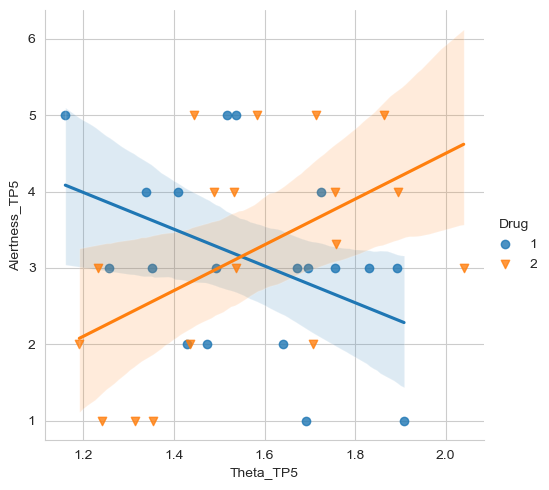

In [69]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Theta_TP5', y ='Alertness_TP5', data = mynewdf_main,  
           hue ='Drug', markers =['o', 'v'])

<Axes: xlabel='Drug', ylabel='Alertness_TP5'>

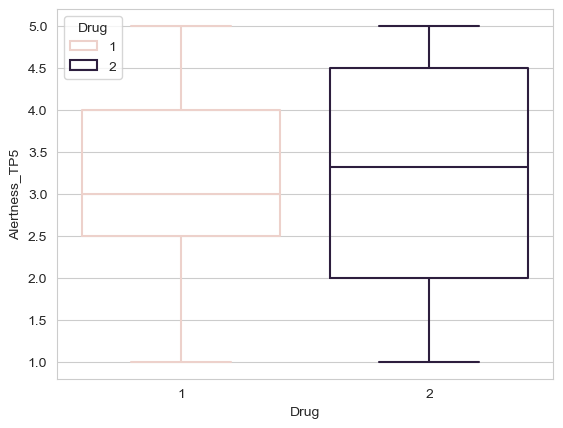

In [73]:
sns.boxplot(data=mynewdf_main, x="Drug", y="Alertness_TP5", hue="Drug", fill=False)